In [9]:
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
from urllib import urlopen
from zipfile import ZipFile
from StringIO import StringIO
import seaborn
%matplotlib inline

# Assignment 1: Compare Tests for Goodness of Fit
Question: Is there a difference between the age distribution of citibike riders and the gaussian distribution?

$H_o$: There is no significant difference (p=0.05) between the age distribution of citibike riders and the gaussian distribution.

$H_a$: There is a significant difference (p=0.05) between the age distribution of citibike riders and the gaussian distribution.

In [2]:
#Loading citibike data.
url = urlopen("https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip").read()
unzip = ZipFile(StringIO(url))
data =  unzip.open('201606-citibike-tripdata.csv')
df = pd.read_csv(data)z
df = df[['birth year', 'start station latitude', 'start station longitude']].copy()
df = df.rename(columns = {'birth year' : 'birthyear', 'start station latitude' : 'lat',
                          'start station longitude' : 'long' })
df['age'] = 2016 - df.birthyear
df.dropna(0, 'any', inplace = True)
df.head()

,birthyear,lat,long,age
0,1972.0,40.734011,-74.002939,44.0
1,1967.0,40.719009,-73.958525,49.0
2,1989.0,40.764618,-73.987895,27.0
3,1991.0,40.757148,-73.972078,25.0
4,1989.0,40.729039,-73.994046,27.0


In [3]:
#Generate distributions
norm = np.random.normal(df.age.mean(), df.age.std(), size = len(df))
dfn = pd.DataFrame(norm)
dfn.columns = ["NormalDist"]
chis = np.random.chisquare(df.age.mean(), size = len(df))
dfc = pd.DataFrame(chis)
dfc.columns = ["ChiDist"]

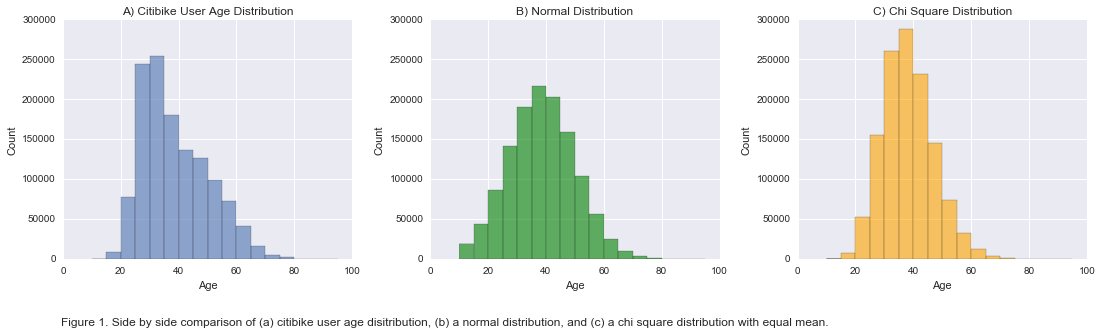

In [4]:
b = np.arange(10, 99, 5)
fig, (ax, axn, axc) = pl.subplots(nrows = 1, ncols = 3, figsize = (16,5))
pl.tight_layout(pad = 5)
#Citibike Dist
ax.hist(df['age'], bins = b, alpha = 0.6)
ax.axis([0, 100, 0, 300000])
ax.set_ylabel('Count')
ax.set_xlabel('Age')
ax.set_title('A) Citibike User Age Distribution')
#Normal Dist
axn.hist(dfn['NormalDist'], bins = b, alpha = 0.6, facecolor = 'g')
axn.axis([0, 100, 0, 300000])
axn.set_ylabel('Count')
axn.set_xlabel('Age')
axn.set_title('B) Normal Distribution')
#Chi Square Dist
axc.hist(dfc['ChiDist'], bins = b, alpha = 0.6, facecolor = 'orange')
axc.axis([0, 100, 0, 300000])
axc.set_ylabel('Count')
axc.set_xlabel('Age')
axc.set_title('C) Chi Square Distribution')
fig.text(0.06, 0, """Figure 1. Side by side comparison of (a) citibike user \
age disitribution, (b) a normal distribution, and (c) a chi square distribution with equal mean.""", fontsize = 12)

## KS Test
### Citibike User Age Distribution vs. Normal Distribution

In [5]:
ks1 = scipy.stats.ks_2samp(df.age, dfn.NormalDist)
print (ks1)

Ks_2sampResult(statistic=0.10908836529888261, pvalue=0.0)


###### Since p<0.05 we can reject the null hypothesis and accept the alternative: There is a significant difference (p=0.05) between the age distribution of citibike riders and the gaussian distribution.

### Citibike User Age Distribution vs. Chi Square Distribution

In [6]:
ks2 = scipy.stats.ks_2samp(df.age, dfc.ChiDist)
print (ks2)

Ks_2sampResult(statistic=0.1410799992411739, pvalue=0.0)


###### Since p<0.05 we can reject the null hypothesis and accept the alternative: There is a significant difference (p=0.05) between the age distribution of citibike riders and the chi square distribution.

## Chi Square Test
### Citibike User Age Distribution vs. Normal Distribution

In [7]:
scipy.stats.chisquare(df.age, dfn.NormalDist)

Power_divergenceResult(statistic=12588705.338830354, pvalue=0.0)

##### Since p<0.05 we can reject the null hypothesis and accept the alternative: There is a significant difference (p=0.05) between the age distribution of citibike riders and the gaussian distribution.
### Citibike User Age Distribution vs. Chi Square Distribution

In [8]:
scipy.stats.chisquare(df.age, dfc.ChiDist)

Power_divergenceResult(statistic=7326002.6804391947, pvalue=0.0)

##### Since p<0.05 we can reject the null hypothesis and accept the alternative: There is a significant difference (p=0.05) between the age distribution of citibike riders and the chi square distribution.